# EDA, Customer Segmentation using RFM and KMeans

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

This kernel is EDA and customer segmentation on Online Retail II data set containing all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

**Types of Segmentation factors:**

* Demographic (Age, Gender, Income, Location, Education, Ethnicity)
* Psychographic (Interests, Lifestyles, Priorities, Motivation, Influence)
* Behavioural (Purchasing habits, Spending habits, User status, Brand interactions)
* Geographic (zip code, city, country, climate)

**Major purpose of customer segmentation is Testing Pricing options, Focusing on Profitable customers, Communicating Targeted Marketing messages.**

**Methodology**

In this dataset we only have features that demonstrate Purchasing habits and Spending habits (Behavioural) factors.
We perform RFM Modelling and KMeans Clustering on this dataset to segment customers.

### Importing required libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from numpy import math

pd.set_option("display.max_columns", 50)

**Loading Dataset**

In [118]:
retail_df=pd.read_csv('online_retail_II.csv')
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [119]:
# shape of dataset
retail_df.shape

(1067371, 8)

### Data Wrangling

In [120]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [121]:
# Checking for Null values
retail_df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

### Observations
* Datatype of InvoiceDate is object need to convert it into datatime.
* There are null values in CustomerID and Description.

**Customer ID is our Identification feature and Description has Product description.**

**We cannot do RFM analysis and KMeans Clustering without Customer ID values.**

**Hence, droppingg the missing values**

In [122]:
retail_df.dropna(subset=['Customer ID'],inplace=True)

In [123]:
retail_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

**DataSet Summary**

In [124]:
retail_df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


We observe Quantity and Price columns have negative values lets explore these entries

In [125]:
retail_df[retail_df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


**Invoice numbers start with C and as per description of data these are cancellations hence dropping these entries** 

In [126]:
# changing the datatype to str
retail_df['Invoice'] = retail_df['Invoice'].astype('str')

In [127]:
retail_df=retail_df[~retail_df['Invoice'].str.contains('C')]

In [128]:
retail_df[retail_df['Price']<=0].sort_values('Price')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
840208,564651,22955,36 FOIL STAR CAKE CASES,144,2011-08-26 14:19:00,0.0,14646.0,Netherlands
840207,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,2011-08-26 14:19:00,0.0,14646.0,Netherlands
840206,564651,23270,SET OF 2 CERAMIC PAINTED HEARTS,96,2011-08-26 14:19:00,0.0,14646.0,Netherlands
823515,562973,23157,SET OF 6 NATIVITY MAGNETS,240,2011-08-11 11:42:00,0.0,14911.0,EIRE
...,...,...,...,...,...,...,...,...
327801,521375,22202,MILK PAN PINK RETROSPOT,3,2010-09-05 11:58:00,0.0,12647.0,Germany
296375,518231,22472,TV DINNER TRAY DOLLY GIRL,9,2010-08-05 15:28:00,0.0,12471.0,Germany
276858,516304,22690,DOORMAT HOME SWEET HOME BLUE,6,2010-07-19 13:13:00,0.0,14025.0,United Kingdom
400047,527696,22121,NOEL WOODEN BLOCK LETTERS,1,2010-10-18 15:13:00,0.0,13554.0,United Kingdom


**We observe that these are not product purchase transactions but transactions of store related to some debt hence also deopping these entries**

In [129]:
# taking price values greater than 0.
retail_df=retail_df[retail_df['Price']>0]
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [130]:
retail_df.shape

(805549, 8)

**Our data got reduced now we have 1041671 datapoints**

In [131]:
retail_df.describe()

,Quantity,Price,Customer ID
count,805549.000000,805549.000000,805549.000000
mean,13.290522,3.206561,15331.954970
std,143.634088,29.199173,1696.737039
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


### Feature Engineering

In [132]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26:33.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [133]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)
retail_df["second"] = retail_df["InvoiceDate"].apply(lambda x: x.second)

In [134]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [135]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

**Making total amount column by multiplying quantity with price**

In [136]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['Price']

In [137]:
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month_num,day_num,hour,minute,second,Month,Day,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,30.0


## Exploratory Data Analysis

In [138]:
retail_df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'second', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

**TOP 10 HIGHEST SELLING PRODUCTS SOLD BY THE STORE**

In [139]:
df1=retail_df.groupby('Description').sum()
df1.sort_values(['Quantity'], ascending=False,inplace=True)
df1.reset_index(inplace=True)
df1.rename(columns={'Description':'Product_name'},inplace=True)
df2=df1[['Product_name','Quantity']][:10]
df2

,Product_name,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
1,WHITE HANGING HEART T-LIGHT HOLDER,93640
2,"PAPER CRAFT , LITTLE BIRDIE",80995
3,ASSORTED COLOUR BIRD ORNAMENT,79913
4,MEDIUM CERAMIC TOP STORAGE JAR,77916
5,JUMBO BAG RED RETROSPOT,75759
6,BROCADE RING PURSE,71129
7,PACK OF 60 PINK PAISLEY CAKE CASES,55270
8,60 TEATIME FAIRY CAKE CASES,53495
9,PACK OF 72 RETROSPOT CAKE CASES,46107


Text(0.5, 1.0, 'Top 10 products by quantity')

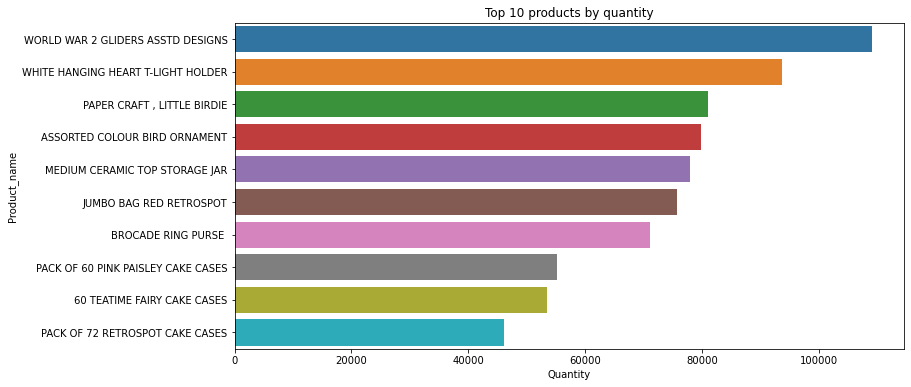

In [140]:
# top 10 products by quantity
plt.figure(figsize=(12,6))
sns.barplot(x=df2['Quantity'],y=df2['Product_name'])
plt.title('Top 10 products by quantity')

### Observations
* WORLD WAR 2 GLIDERS ASSTD DESIGNS	was the highest selling product
* WHITE HANGING HEART T-LIGHT HOLDER was the second highest selling product

**10 LEAST SELLING PRODUCTS OF THE STORE**

In [141]:
df3=df1[['Product_name','Quantity']].tail(10)
df3

,Product_name,Quantity
5273,WHITE SCANDINAVIAN HEART CHRISTMAS,1
5274,ENGLISH ROSE TEA FOR ONE GIFT BOX,1
5275,OWLS CHARLOTTE BAG,1
5276,F FAIRY POTPOURRI CUSHIONS SUMMER,1
5277,"F.FAIRY S/3 SML CANDLE, LAVENDER",1
5278,"F.FAIRY S/3 SML CANDLE, ROSE",1
5279,"F.FAIRY S/3 SML CANDLE,LILY/VALLEY",1
5280,VINTAGE METAL CAKE STAND CREAM,1
5281,"F.FAIRY,CANDLE IN GLASS,LILY/VALLEY",1
5282,RUSSIAN FOLKART STACKING TINS,1


**These are the least selling products of the store with only 1 unit sold of each product**

**TOP 10 STOCKCODES BY QUANTITY**

In [142]:
df4=retail_df.groupby('StockCode').sum()
df4.sort_values(['Quantity'], ascending=False,inplace=True)
df4.reset_index(inplace=True)
df5=df4[['StockCode','Quantity']][:10]
df5

,StockCode,Quantity
0,84077,109169
1,85099B,94983
2,85123A,93697
3,21212,91263
4,23843,80995
5,84879,79913
6,22197,77971
7,23166,77916
8,17003,71129
9,21977,55270


Text(0.5, 1.0, 'Top 10 StockCodes by quantity')

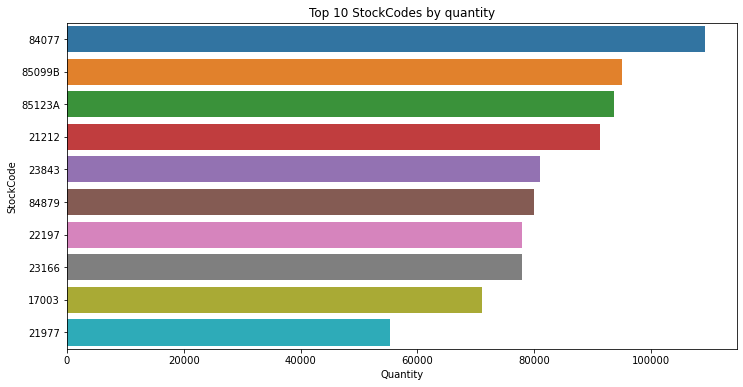

In [143]:
# top 10 StockCodes by quantity
plt.figure(figsize=(12,6))
sns.barplot(x=df5['Quantity'],y=df5['StockCode'])
plt.title('Top 10 StockCodes by quantity')

**TOP 10 HIGHEST SPENDING CUSTOMERS**

In [144]:
Top10Spending=retail_df.groupby('Customer ID')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False).head(10)
Top10Spending

,Customer ID,TotalAmount
5692,18102.0,608821.65
2277,14646.0,528602.52
1789,14156.0,313946.37
2538,14911.0,295972.63
5050,17450.0,246973.09
1331,13694.0,196482.81
5109,17511.0,175603.55
4061,16446.0,168472.50
4295,16684.0,147142.77
68,12415.0,144458.37


Text(0.5, 1.0, 'Top 10 Spending Customers.')

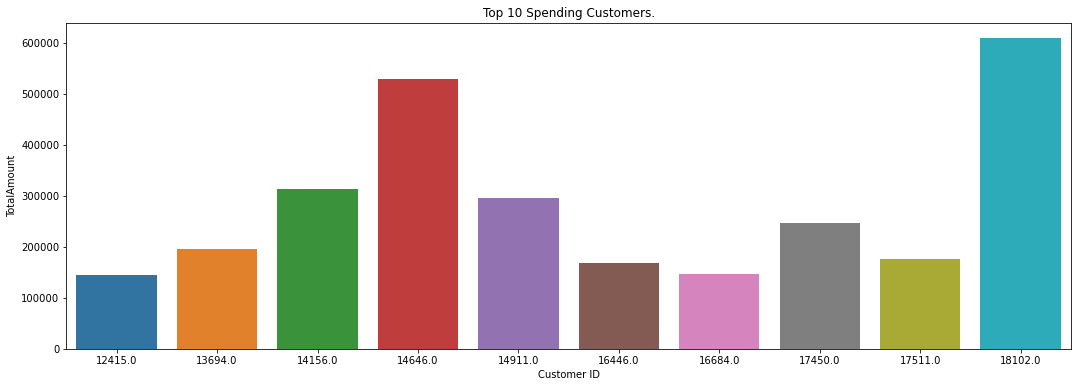

In [145]:
# Top 10 Spending Customers
plt.figure(figsize=(18,6))
sns.barplot(x=Top10Spending['Customer ID'],y=Top10Spending['TotalAmount'].head(10))
plt.title('Top 10 Spending Customers.')

**TOP 10 MOST FREQUENT CUSTOMERS**

In [146]:
Top10Frequent=retail_df['Customer ID'].value_counts().reset_index().rename(columns={'index':'Customer ID','Customer ID':'Frequency'}).head(10)
Top10Frequent

,Customer ID,Frequency
0,17841.0,12890
1,14911.0,11245
2,12748.0,7228
3,14606.0,6566
4,14096.0,5111
5,15311.0,4434
6,14156.0,4048
7,14646.0,3849
8,13089.0,3362
9,16549.0,3250


**We observe that both lists have 3 Customer IDs common imptlying most frequent customers tend to be the most spending customers**

**TOP 10 CUSTOMERS BY AVERAGE ORDER AMOUNT**

In [147]:
avg_amount=retail_df.groupby('Customer ID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False).head(10)

In [148]:
avg_amount

,Customer ID,Avg_amount_per_customer
4061,16446.0,56157.500000
2722,15098.0,13305.500000
569,12918.0,10953.500000
3382,15760.0,6958.170000
3371,15749.0,4453.430000
2819,15195.0,3861.000000
854,13205.0,2803.200000
0,12346.0,2281.072353
5438,17846.0,2033.100000
2826,15202.0,2000.496667


Text(0.5, 1.0, 'Average amount spent by each Customer')

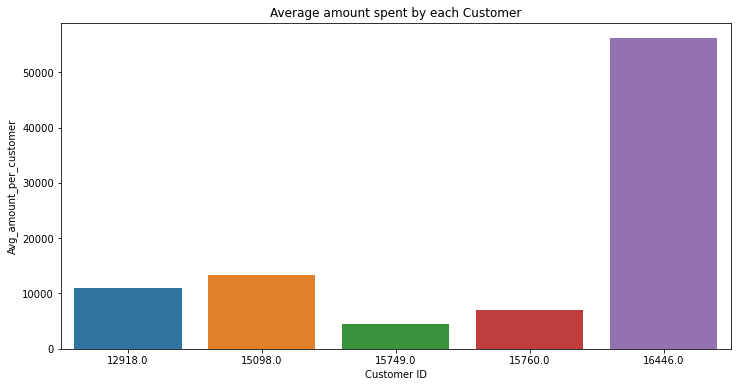

In [149]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['Customer ID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each Customer')

**TOP COUNTRIES CONTRIBUTING HIGHEST REVENUE TO THE STORE** 

In [150]:
TopCountries=retail_df.groupby('Country')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
TopCountries

,Country,TotalAmount
38,United Kingdom,1.472315e+07
10,EIRE,6.216311e+05
24,Netherlands,5.542323e+05
14,Germany,4.312625e+05
13,France,3.552575e+05
0,Australia,1.699681e+05
32,Spain,1.091785e+05
34,Switzerland,1.003653e+05
33,Sweden,9.154972e+04
9,Denmark,6.986219e+04


Text(0.5, 1.0, 'Top 5 Countries based on highest store revenue contributions')

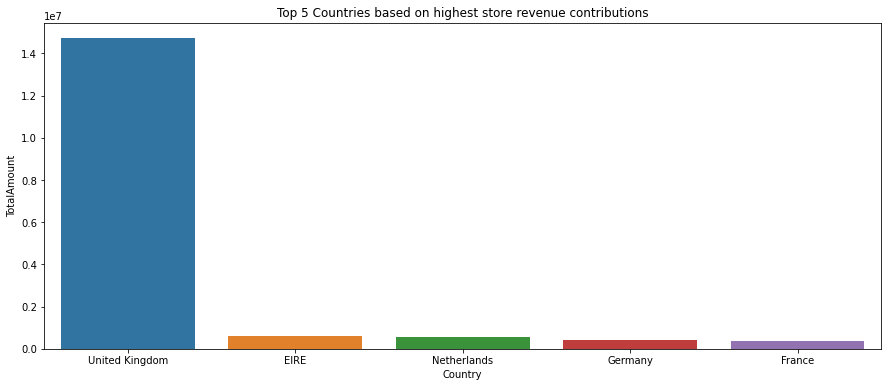

In [151]:
# top 5 countries where maximum sale happens.
plt.figure(figsize=(15,6))
sns.barplot(x=TopCountries['Country'].head(5),y=TopCountries['TotalAmount'].head(5))
plt.title('Top 5 Countries based on highest store revenue contributions')

**UK contributes most revenue to the store**

**European countries like Germany, France, Netherlands, EIRE contribute significant revenue to the store**

Text(0.5, 1.0, 'Top 5 Countries based on last store revenue contributors ')

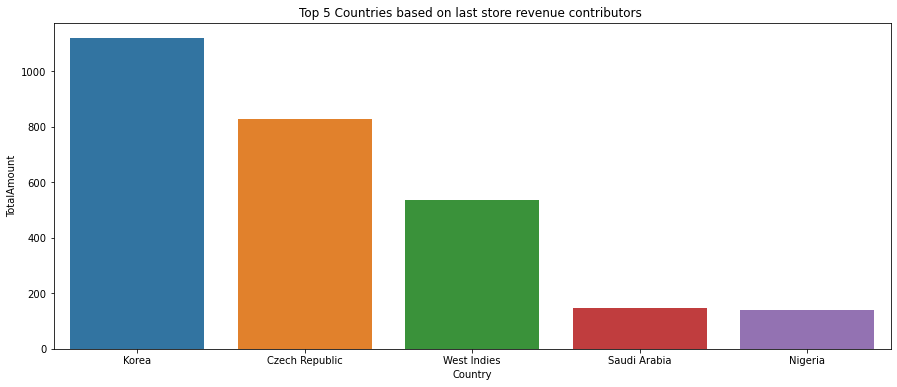

In [152]:
# top 5 countries where least sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=TopCountries['Country'].tail(5),y=TopCountries['TotalAmount'].tail(5))
plt.title('Top 5 Countries based on last store revenue contributors ')

**Countries contributing least to the store revenue are non european countries**

In [153]:
SalesbyMonth=retail_df.groupby('Month')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
SalesbyMonth

,Month,TotalAmount
9,November,2334153.422
2,December,2089456.840
10,October,2075998.790
11,September,1784453.383
6,June,1300280.270
7,March,1295109.751
8,May,1278580.350
1,August,1249586.550
5,July,1191727.751
4,January,1126764.102


Text(0.5, 1.0, 'Sales in different Months ')

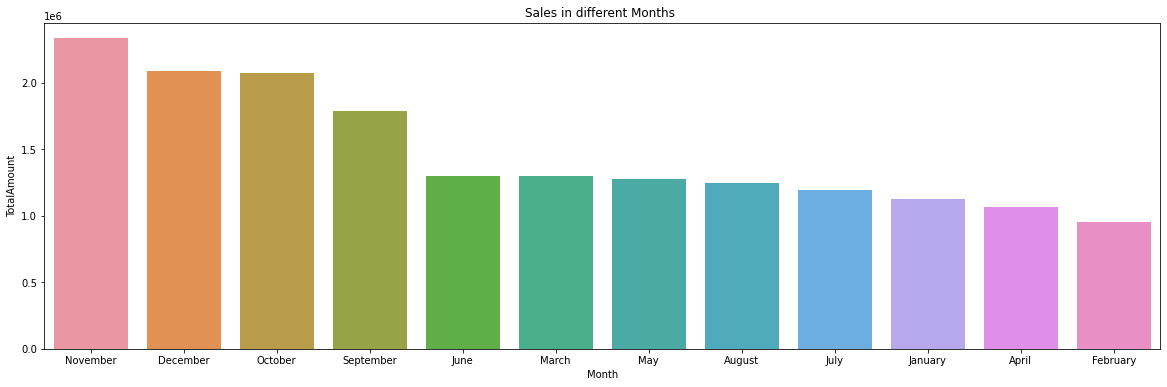

In [154]:
# Sales different months.
plt.figure(figsize=(20,6))
sns.barplot(x=SalesbyMonth['Month'],y=SalesbyMonth['TotalAmount'])
plt.title('Sales in different Months ')

**Highest sales happened in the month of November (Eve of Holiday Season) while least sale happened in the month of February**

In [155]:
sales_on_day_basis=retail_df.groupby('Day')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
sales_on_day_basis

,Day,TotalAmount
4,Thursday,3841082.962
5,Tuesday,3384678.832
6,Wednesday,3115619.693
1,Monday,2817407.806
0,Friday,2758423.493
3,Sunday,1816413.342
2,Saturday,9803.050


Text(0.5, 1.0, 'Sales onn different Days ')

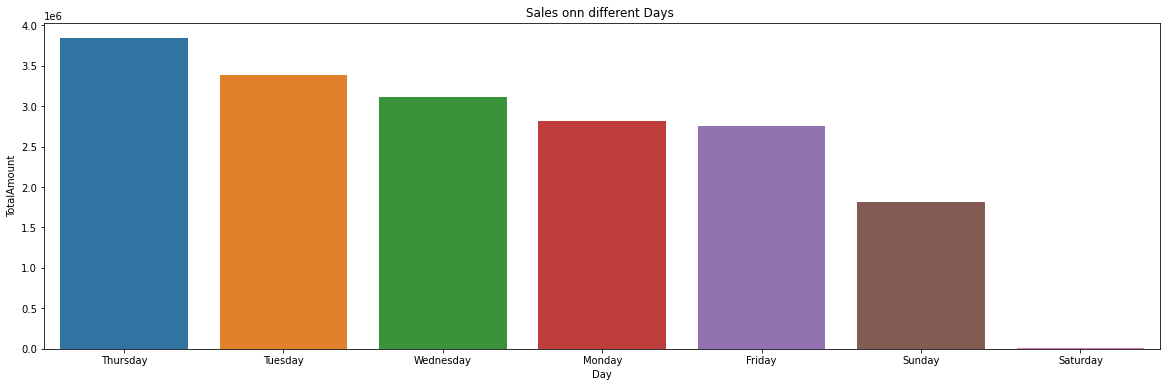

In [156]:
# Sales on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['TotalAmount'])
plt.title('Sales onn different Days ')

**Sale on Thursdays is very high**

**Sale on Saturdays is very low**

In [157]:
salescount_on_day_basis=retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
salescount_on_day_basis

,Day,Sale_count
0,Thursday,161664
1,Tuesday,136794
2,Wednesday,136501
3,Sunday,136329
4,Monday,128359
5,Friday,105502
6,Saturday,400


Text(0.5, 1.0, 'Sales count on different Days ')

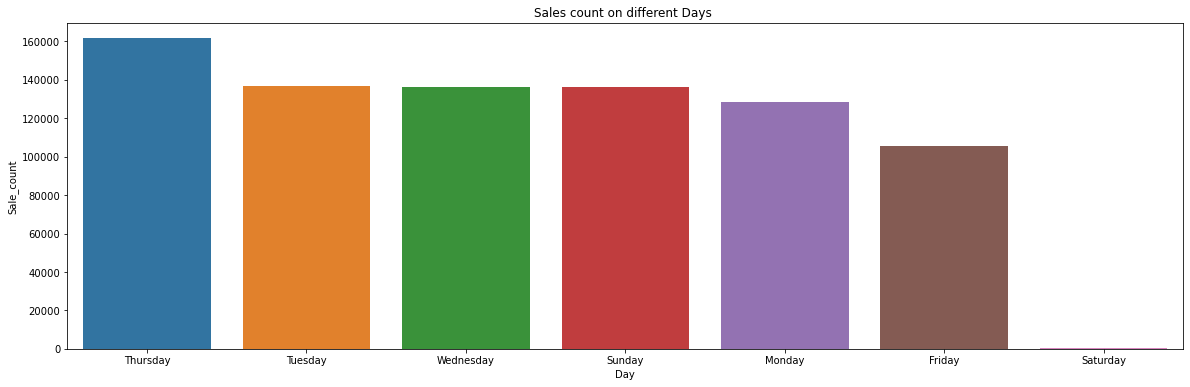

In [158]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=salescount_on_day_basis['Day'],y=salescount_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

**As the sales revenue and sales count is negligible on Saturdays probably the store is closed on Saturday and the few orders have been given on phone**

**SALES IN DIFFERENT DAY TIMINGS**

In [159]:
retail_df['hour'].unique()

array([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8, 20,  6],
      dtype=int64)

In [160]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening' 

In [161]:
retail_df['Day_time_type']=retail_df['hour'].apply(time)

In [162]:
sales_timing=retail_df.groupby('Day_time_type')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
sales_timing

,Day_time_type,TotalAmount
0,Afternoon,1.063495e+07
2,Morning,6.747350e+06
1,Evening,3.611272e+05


Text(0.5, 1.0, 'Sales count in different day timings')

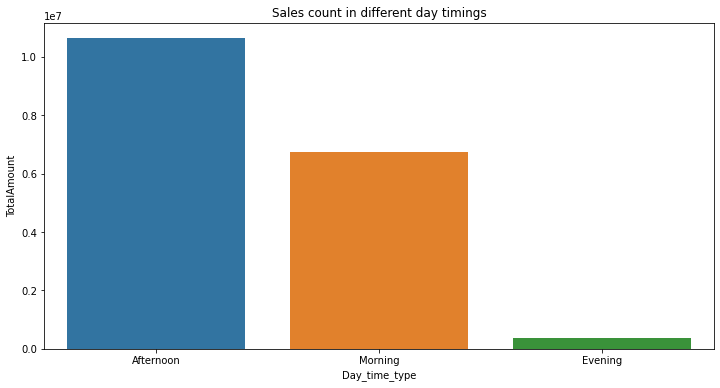

In [163]:
#Sales on different day-time types
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['TotalAmount'])
plt.title('Sales count in different day timings')

# Model Building

## RFM Model Analysis

* **RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.**

* **RECENCY: How recently did the customer visit our website or how recently did a customer purchase?**

* **Frequency: How often do they visit or how often do they purchase?**

* **Monetary: How much revenue we get from their visit or how much do they spend when they purchase?**

**The RFM Analysis helps the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.**

In [164]:
rfm_dataframe=retail_df.copy()

In [165]:
rfm_dataframe.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month_num,day_num,hour,minute,second,Month,Day,TotalAmount,Day_time_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,83.4,Morning
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0,Morning
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,81.0,Morning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,100.8,Morning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,45,0,December,Tuesday,30.0,Morning


In [166]:
#Recency = Latest Date - Last Invoice Date, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM Modelling scores for each customer
rfm_dataframe = retail_df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'Invoice': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency', 
                         'Invoice': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,34,77556.46
1,12347.0,2,253,5633.32
2,12348.0,75,51,2019.40
3,12349.0,18,175,4428.69
4,12350.0,310,17,334.40


**Descriptive Summary and distribution of Recency**

In [167]:
rfm_dataframe.Recency.describe()

count    5878.000000
mean      200.866791
std       209.353961
min         0.000000
25%        25.000000
50%        95.000000
75%       379.000000
max       738.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

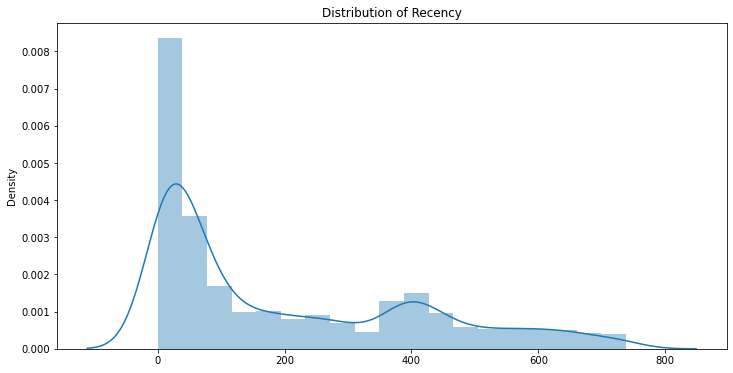

In [168]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Recency'])
plt.title('Distribution of Recency')

**Recency distribution is right skewed**

**Descriptive summary and distribution of Frequency**

In [169]:
rfm_dataframe['Frequency'].describe()

count     5878.000000
mean       137.044743
std        353.818629
min          1.000000
25%         21.000000
50%         53.000000
75%        142.000000
max      12890.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of Frequency')

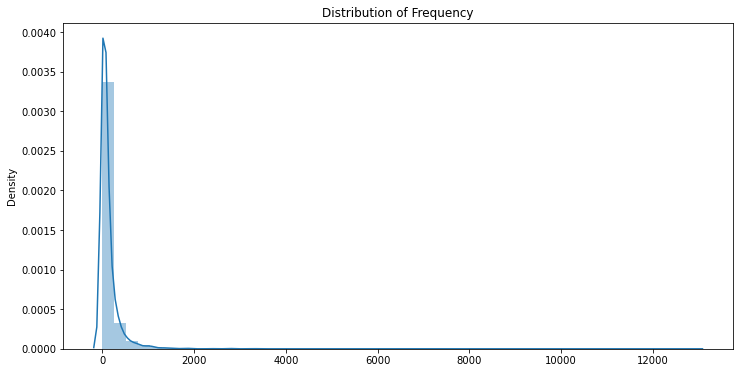

In [170]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.title('Distribution of Frequency')

**Frequency distribution is skewed to extreme right**

**Descriptive summary and distribution of Monetary**

In [171]:
rfm_dataframe['Monetary'].describe()

count      5878.000000
mean       3018.616737
std       14737.731040
min           2.950000
25%         348.762500
50%         898.915000
75%        2307.090000
max      608821.650000
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetary')

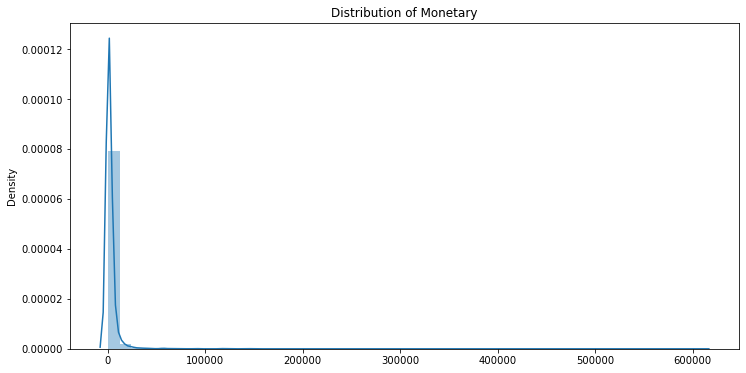

In [172]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Monetary'])
plt.title('Distribution of Monetary')

**Monetary distribution is skewed to extreme right**

**Splitting data into four sections using quantile**

In [173]:
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])

In [174]:
quantile = quantile.to_dict()

In [175]:
quantile

{'Recency': {0.25: 25.0, 0.5: 95.0, 0.75: 379.0},
 'Frequency': {0.25: 21.0, 0.5: 53.0, 0.75: 142.0},
 'Monetary': {0.25: 348.76249999999993, 0.5: 898.915, 0.75: 2307.09}}

In [176]:
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# Good customer= Low Recency, High Frequency, High Monetary

#Function for scoring recency
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1                               
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

#Function for scoring frequency and Monetary
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

Calculating R,F and M values and adding to dataframe

In [177]:
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346.0,325,34,77556.46,3,3,1
12347.0,2,253,5633.32,1,1,1
12348.0,75,51,2019.40,2,3,2
12349.0,18,175,4428.69,1,1,1
12350.0,310,17,334.40,3,4,4


Adding Combined RFM value to dataset

In [178]:
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

Adding RFM Score column summing R,F and M values

In [179]:
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
Customer ID,,,,,,,,
12346.0,325,34,77556.46,3,3,1,331,7
12347.0,2,253,5633.32,1,1,1,111,3
12348.0,75,51,2019.40,2,3,2,232,7
12349.0,18,175,4428.69,1,1,1,111,3
12350.0,310,17,334.40,3,4,4,344,11


In [180]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5878 non-null   int32  
 1   Frequency  5878 non-null   int64  
 2   Monetary   5878 non-null   float64
 3   R          5878 non-null   int64  
 4   F          5878 non-null   int64  
 5   M          5878 non-null   int64  
 6   RFM_Group  5878 non-null   object 
 7   RFM_Score  5878 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 390.3+ KB


In [181]:
rfm_dataframe['RFM_Score'].unique()

array([ 7,  3, 11,  5,  9,  8,  4, 10,  6, 12], dtype=int64)

Assigning Loyalty Level to each customer

In [182]:
Loyalty_Level = ['Platinum','Gold','Silver','Bronze']
Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12346.0,325,34,77556.46,3,3,1,331,7,Gold
1,12347.0,2,253,5633.32,1,1,1,111,3,Platinum
2,12348.0,75,51,2019.40,2,3,2,232,7,Gold
3,12349.0,18,175,4428.69,1,1,1,111,3,Platinum
4,12350.0,310,17,334.40,3,4,4,344,11,Bronze


Checking data for RFM_Group=111

In [183]:
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,18102.0,0,1058,608821.65,1,1,1,111,3,Platinum
1,14646.0,1,3849,528602.52,1,1,1,111,3,Platinum
2,14156.0,9,4048,313946.37,1,1,1,111,3,Platinum
3,14911.0,1,11245,295972.63,1,1,1,111,3,Platinum
4,17450.0,8,424,246973.09,1,1,1,111,3,Platinum
5,13694.0,3,1525,196482.81,1,1,1,111,3,Platinum
6,17511.0,2,1911,175603.55,1,1,1,111,3,Platinum
7,16684.0,4,718,147142.77,1,1,1,111,3,Platinum
8,12415.0,24,926,144458.37,1,1,1,111,3,Platinum
9,15061.0,3,987,137818.52,1,1,1,111,3,Platinum


**Bar Chart of Loyalty Level**

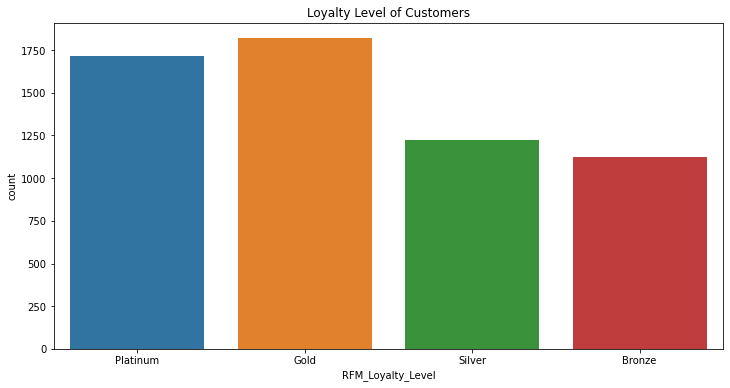

In [184]:
plt.figure(figsize=(12,6))
sns.countplot(rfm_dataframe['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

In [185]:
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [186]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency                Monetary  \
                         mean min  max        mean min    max         mean   
RFM_Loyalty_Level                                                            
Platinum            36.953298   0  379  356.246935  25  12890  8051.823145   
Gold               149.024189   0  731   78.986806   1   1117  1657.372100   
Silver             267.971405   1  738   29.656863   1    137   567.048652   
Bronze             461.962567  96  738   13.655080   1     53   215.533628   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinum           470.73  608821.65  1713  
Gold               112.32  168472.50  1819  
Silver               6.20   13916.34  1224  
Bronze               2.95     877.70  1122

In [187]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Monetary]

In [188]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_dataframe[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

**Now let's Visualize the Distribution of Recency,Frequency and Monetary.**

Text(0.5, 1.0, 'Distribution of Recency')

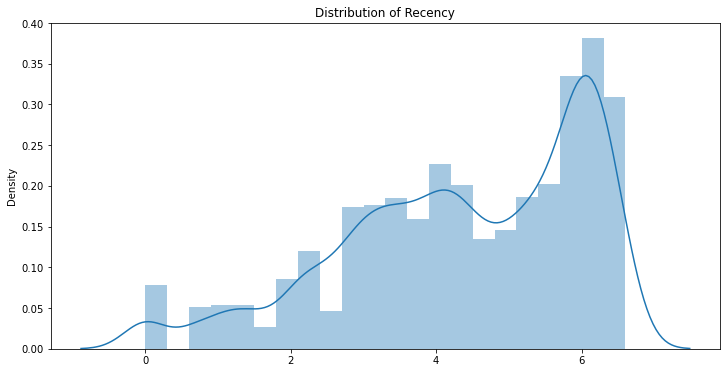

In [189]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Recency'])
plt.title('Distribution of Recency')

Text(0.5, 1.0, 'Distribution of Frequency')

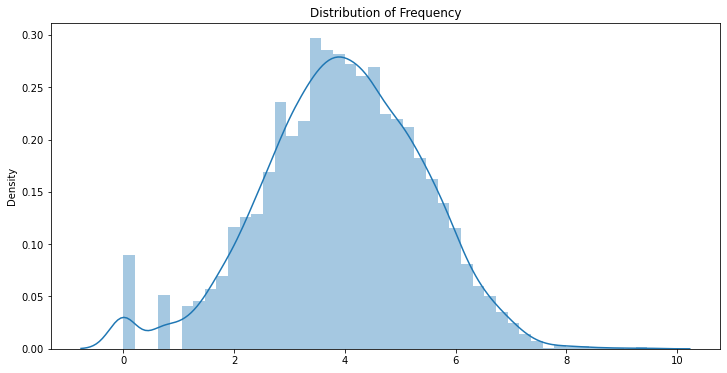

In [190]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Frequency'])
plt.title('Distribution of Frequency')

Text(0.5, 1.0, 'Distribution of Monetary')

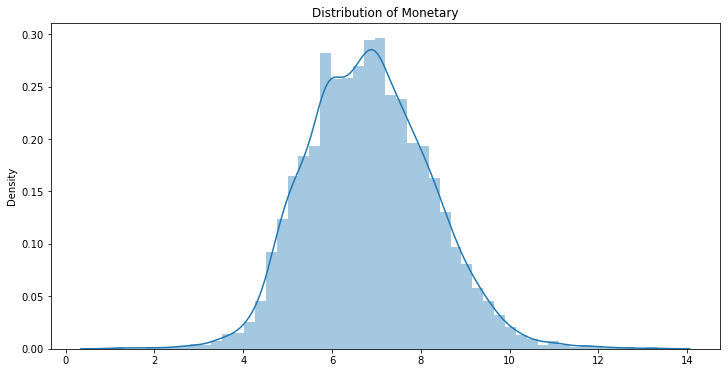

In [191]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Monetary'])
plt.title('Distribution of Monetary')

In [192]:
rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [193]:
rfm_dataframe

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log
Customer ID,,,,,,,,,,,,
12346.0,325,34,77556.46,3,3,1,331,7,Gold,5.783825,3.526361,11.258761
12347.0,2,253,5633.32,1,1,1,111,3,Platinum,0.693147,5.533389,8.636454
12348.0,75,51,2019.40,2,3,2,232,7,Gold,4.317488,3.931826,7.610556
12349.0,18,175,4428.69,1,1,1,111,3,Platinum,2.890372,5.164786,8.395859
12350.0,310,17,334.40,3,4,4,344,11,Bronze,5.736572,2.833213,5.812338
...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,3,986,2736.65,1,1,1,111,3,Platinum,1.098612,6.893656,7.914490
18284.0,431,28,461.68,4,3,3,433,10,Silver,6.066108,3.332205,6.134872
18285.0,660,12,427.00,4,4,3,443,11,Bronze,6.492240,2.484907,6.056784


## KMeans Clustering

### Applying Elbow Method on Recency and Monetary.

In [194]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

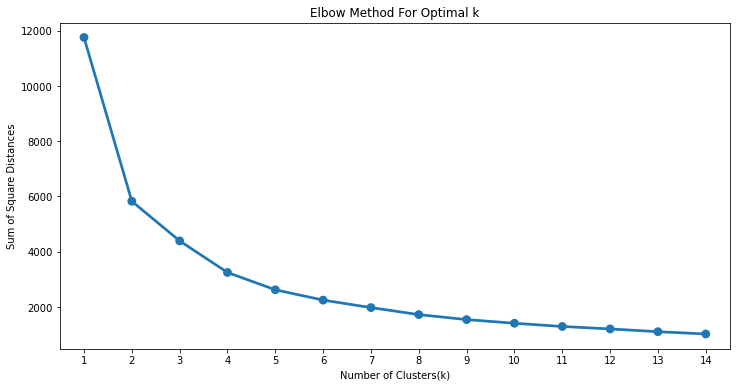

In [195]:
# taking Recency_log and Monetary_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetary in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Silhouette Score**

In [196]:
# taking Recency_log and Monetary_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetary in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4387674620121568
For n_clusters = 3, silhouette score is 0.34745847294740545
For n_clusters = 4, silhouette score is 0.3818061425323348
For n_clusters = 5, silhouette score is 0.36960538629940687
For n_clusters = 6, silhouette score is 0.3709037898204936
For n_clusters = 7, silhouette score is 0.34368142070356045
For n_clusters = 8, silhouette score is 0.34492914646333644
For n_clusters = 9, silhouette score is 0.34809624978986287
For n_clusters = 10, silhouette score is 0.3482774170389818
For n_clusters = 11, silhouette score is 0.35373434392746245
For n_clusters = 12, silhouette score is 0.3551174299662927
For n_clusters = 13, silhouette score is 0.34674980642429787
For n_clusters = 14, silhouette score is 0.34570345046239126
For n_clusters = 15, silhouette score is 0.3436466577283275


In [197]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans= kmeans_rec_mon.predict(X)

In [198]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon
Customer ID,,,,,,,,,,,,,
12346.0,325,34,77556.46,3,3,1,331,7,Gold,5.783825,3.526361,11.258761,0
12347.0,2,253,5633.32,1,1,1,111,3,Platinum,0.693147,5.533389,8.636454,0
12348.0,75,51,2019.40,2,3,2,232,7,Gold,4.317488,3.931826,7.610556,0
12349.0,18,175,4428.69,1,1,1,111,3,Platinum,2.890372,5.164786,8.395859,0
12350.0,310,17,334.40,3,4,4,344,11,Bronze,5.736572,2.833213,5.812338,1
12351.0,375,21,300.93,3,4,4,344,11,Bronze,5.926926,3.044522,5.706878,1
12352.0,36,103,2849.84,2,2,1,221,5,Platinum,3.583519,4.634729,7.955018,0
12353.0,204,24,406.76,3,3,3,333,9,Silver,5.318120,3.178054,6.008223,1
12354.0,232,58,1079.40,3,2,2,322,7,Gold,5.446737,4.060443,6.984161,1


In [199]:
# Centers of the clusters
centers = kmeans_rec_mon.cluster_centers_
centers

array([[-0.84680337,  0.7436116 ],
       [ 0.67258314, -0.59062192]])

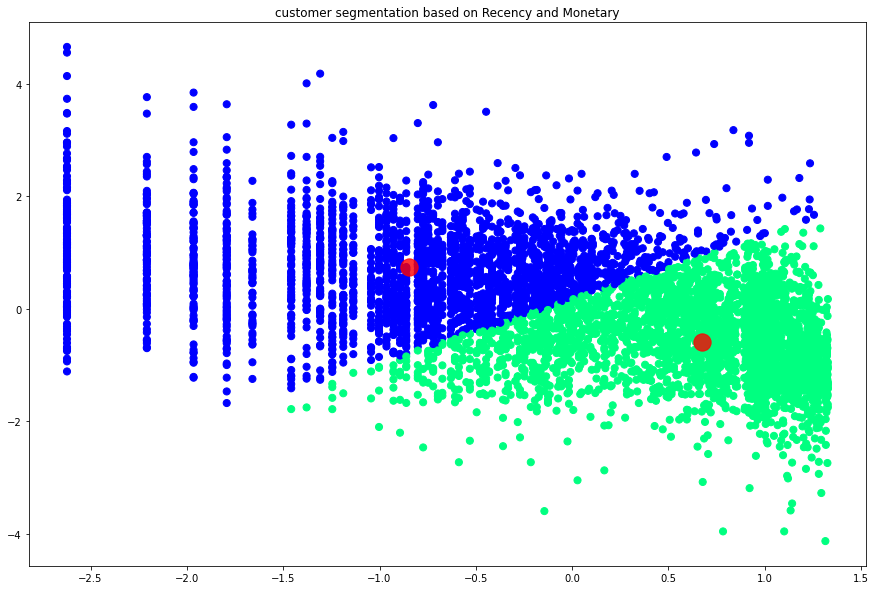

In [200]:
# Visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

In [201]:
data_process_normalized=rfm_dataframe[['Recency','Frequency','Monetary','Recency_log','Frequency_log','Monetary_log','RFM_Loyalty_Level','Cluster_based_rec_mon']]

In [202]:
data_process_normalized.groupby('Cluster_based_rec_mon').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency             \
                             mean min  max        mean min    max   
Cluster_based_rec_mon                                               
0                       40.177308   1  654  254.941923   1  12890   
1                      328.330995   7  738   43.532642   1    543   

                          Monetary                          
                              mean    min        max count  
Cluster_based_rec_mon                                       
0                      6020.087128  90.04  608821.65  2600  
1                       637.950776   2.95    6798.72  3278

### Applying Elbow Method on Frequency and Monetary

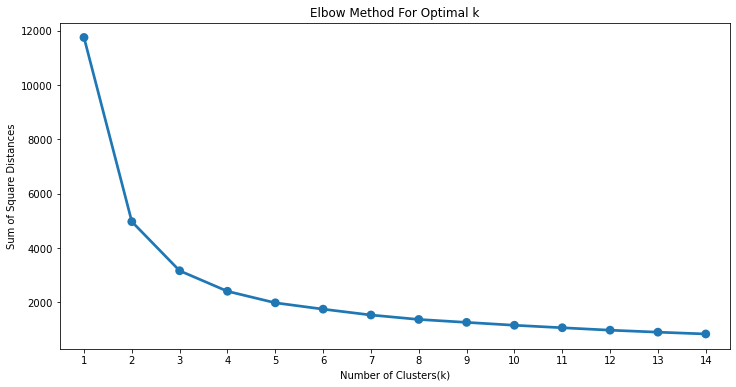

In [203]:
# taking Frequency_log and Monetory_log in list.
Frequency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of frequency and monetary in X.
X=rfm_dataframe[Frequency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [204]:
# taking Frequency_log and Monetory_log in list.
Frequency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of frequency and monetary in X.
X=rfm_dataframe[Frequency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4848905537834523
For n_clusters = 3, silhouette score is 0.4262985946055919
For n_clusters = 4, silhouette score is 0.3902270353744168
For n_clusters = 5, silhouette score is 0.3688076710683434
For n_clusters = 6, silhouette score is 0.3360681327652933
For n_clusters = 7, silhouette score is 0.35149880215862683
For n_clusters = 8, silhouette score is 0.33539323464250964
For n_clusters = 9, silhouette score is 0.346075640590273
For n_clusters = 10, silhouette score is 0.3554496938473401
For n_clusters = 11, silhouette score is 0.34305567256902075
For n_clusters = 12, silhouette score is 0.34698784694169926
For n_clusters = 13, silhouette score is 0.3633993896237444
For n_clusters = 14, silhouette score is 0.3525075930196865
For n_clusters = 15, silhouette score is 0.3606980394974061


In [205]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [206]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon'] = kmeans_freq_mon.labels_
rfm_dataframe.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_on_freq_mon
Customer ID,,,,,,,,,,,,,,
12346.0,325,34,77556.46,3,3,1,331,7,Gold,5.783825,3.526361,11.258761,0,0
12347.0,2,253,5633.32,1,1,1,111,3,Platinum,0.693147,5.533389,8.636454,0,0
12348.0,75,51,2019.40,2,3,2,232,7,Gold,4.317488,3.931826,7.610556,0,0
12349.0,18,175,4428.69,1,1,1,111,3,Platinum,2.890372,5.164786,8.395859,0,0
12350.0,310,17,334.40,3,4,4,344,11,Bronze,5.736572,2.833213,5.812338,1,1
12351.0,375,21,300.93,3,4,4,344,11,Bronze,5.926926,3.044522,5.706878,1,1
12352.0,36,103,2849.84,2,2,1,221,5,Platinum,3.583519,4.634729,7.955018,0,0
12353.0,204,24,406.76,3,3,3,333,9,Silver,5.318120,3.178054,6.008223,1,1
12354.0,232,58,1079.40,3,2,2,322,7,Gold,5.446737,4.060443,6.984161,1,0


In [207]:
# Centers of the clusters
centers = kmeans_freq_mon.cluster_centers_
centers

array([[ 0.76734448,  0.77038293],
       [-0.74877345, -0.75173837]])

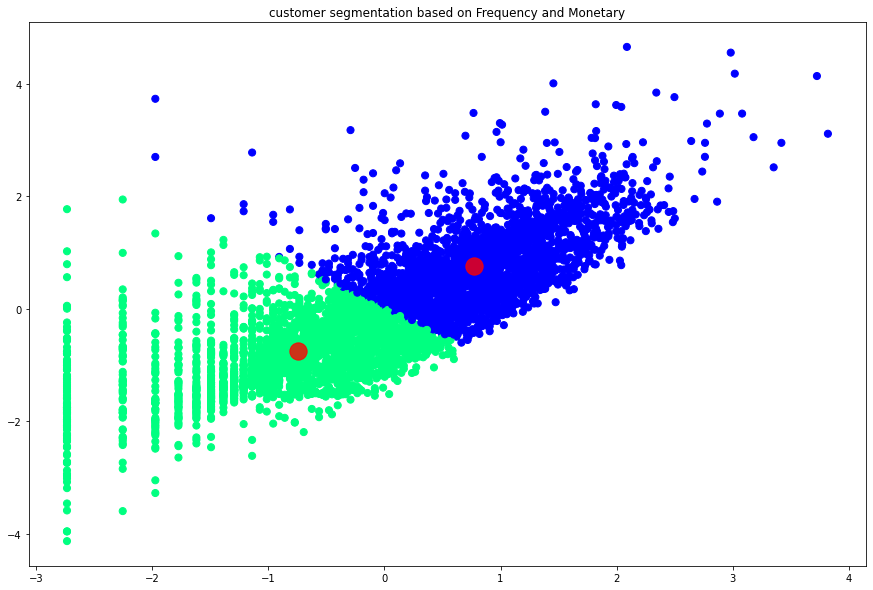

In [208]:
# Visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

In [209]:
data_process_normalized1=rfm_dataframe[['Recency','Frequency','Monetary','Recency_log','Frequency_log','Monetary_log','RFM_Loyalty_Level','Cluster_based_on_freq_mon']]

In [210]:
data_process_normalized1.groupby('Cluster_based_on_freq_mon').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency             \
                                 mean min  max        mean min    max   
Cluster_based_on_freq_mon                                               
0                          107.561161   1  738  251.940567   3  12890   
1                          291.369973   1  738   25.614276   1    123   

                              Monetary                           
                                  mean     min        max count  
Cluster_based_on_freq_mon                                        
0                          5662.429103  401.77  608821.65  2894  
1                           454.544019    2.95   13916.34  2984

### Applying Elbow Method on Recency, Frequency and Monetary.

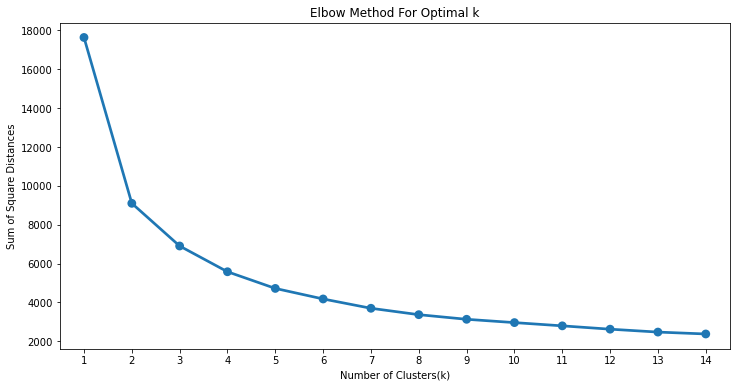

In [211]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_frequency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_frequency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Silhouette Score**

In [212]:
# taking Recency_log,Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4075471632580473
For n_clusters = 3, silhouette score is 0.31335261220790916
For n_clusters = 4, silhouette score is 0.32552825561348175
For n_clusters = 5, silhouette score is 0.29891853320965717
For n_clusters = 6, silhouette score is 0.28276649388755065
For n_clusters = 7, silhouette score is 0.29227620331189413
For n_clusters = 8, silhouette score is 0.2952428611864849
For n_clusters = 9, silhouette score is 0.27912061531979604
For n_clusters = 10, silhouette score is 0.2645289366421794
For n_clusters = 11, silhouette score is 0.26493192055791526
For n_clusters = 12, silhouette score is 0.26578204902512154
For n_clusters = 13, silhouette score is 0.26878656063001155
For n_clusters = 14, silhouette score is 0.2614899292172375
For n_clusters = 15, silhouette score is 0.2526091739699397


In [213]:
# applying Kmeans clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans= kmeans_freq_mon_rec.predict(X)

In [214]:
#Finding the clusters for the observation in the dataset
rfm_dataframe['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm_dataframe.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_on_freq_mon,Cluster_based_on_freq_mon_rec
Customer ID,,,,,,,,,,,,,,,
12346.0,325,34,77556.46,3,3,1,331,7,Gold,5.783825,3.526361,11.258761,0,0,0
12347.0,2,253,5633.32,1,1,1,111,3,Platinum,0.693147,5.533389,8.636454,0,0,0
12348.0,75,51,2019.40,2,3,2,232,7,Gold,4.317488,3.931826,7.610556,0,0,0
12349.0,18,175,4428.69,1,1,1,111,3,Platinum,2.890372,5.164786,8.395859,0,0,0
12350.0,310,17,334.40,3,4,4,344,11,Bronze,5.736572,2.833213,5.812338,1,1,1
12351.0,375,21,300.93,3,4,4,344,11,Bronze,5.926926,3.044522,5.706878,1,1,1
12352.0,36,103,2849.84,2,2,1,221,5,Platinum,3.583519,4.634729,7.955018,0,0,0
12353.0,204,24,406.76,3,3,3,333,9,Silver,5.318120,3.178054,6.008223,1,1,1
12354.0,232,58,1079.40,3,2,2,322,7,Gold,5.446737,4.060443,6.984161,1,0,1


In [215]:
# Centers of the clusters
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[-0.7247092 ,  0.7950437 ,  0.80349978],
       [ 0.58359568, -0.64023482, -0.64704435]])

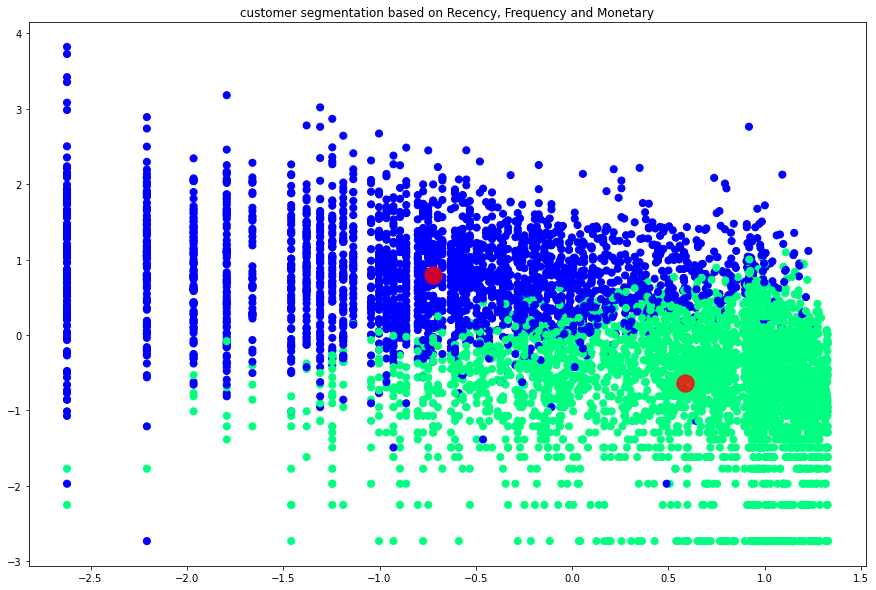

In [216]:
# plotting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

In [217]:
data_process_normalized2=rfm_dataframe[['Recency','Frequency','Monetary','Recency_log','Frequency_log','Monetary_log','RFM_Loyalty_Level','Cluster_based_on_freq_mon_rec']]

In [218]:
data_process_normalized2.groupby('Cluster_based_on_freq_mon_rec').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency             \
                                     mean min  max        mean min    max   
Cluster_based_on_freq_mon_rec                                               
0                               59.783887   1  632  267.410462   1  12890   
1                              314.254679   1  738   32.280147   1    252   

                                  Monetary                           
                                      mean     min        max count  
Cluster_based_on_freq_mon_rec                                        
0                              6072.502075  196.89  608821.65  2619  
1                               564.451133    2.95   13916.34  3259

**We can see that mean of all the features Recency, Frequency and Monetary is significantly different for the two clusters**